#Sentiment Analysis Classificator

## Exploring Data

In [ ]:
# Read Dataset
import pandas as pd
import numpy as np

tweet_dataset = pd.read_csv("/content/drive/MyDrive/training.1600000.processed.noemoticon.csv", encoding='latin', names =["sentiment", "id", "date", "query", "username", "tweet"])
tweet_dataset.head()

,sentiment,id,date,query,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# elimino colonne superflue del dataset
tweet_dataset.drop(["date","query","username","id"], axis=1, inplace=True)

In [ ]:
positives = tweet_dataset[tweet_dataset['sentiment'] == 4]
negatives = tweet_dataset[tweet_dataset['sentiment'] == 0]

print('Shape dataset:         {}'.format(tweet_dataset.shape[0]))
print('N. positve:            {}'.format(len(positives)))
print('N. negative:           {}'.format(len(negatives)))

Shape dataset:         1600000
N. positve:            800000
N. negative:           800000


In [ ]:
print("Dataset shape:", tweet_dataset.shape)
tweet_dataset = tweet_dataset.sample(frac=1)
tweet_dataset = tweet_dataset[:200000] #l'algoritmo performa meglio su un dataset di 200.000 sample
print("Dataset shape:", tweet_dataset.shape)

Dataset shape: (1600000, 2)
Dataset shape: (200000, 2)


In [ ]:
tweet_dataset["sentiment"] = tweet_dataset["sentiment"].replace(4,1) # replacing label 4 con 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
positives = tweet_dataset[tweet_dataset['sentiment'] == 1]
negatives = tweet_dataset[tweet_dataset['sentiment'] == 0]
# controllo bilanciamento del dataset

print('Shape dataset:         {}'.format(tweet_dataset.shape[0]))
print('N. positve:            {}'.format(len(positives)))
print('N. negative:           {}'.format(len(negatives)))

Shape dataset:         200000
N. positve:            100177
N. negative:           99823


In [ ]:
tweet_dataset.info()
tweet_dataset.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 785107 to 835644
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  200000 non-null  int64 
 1   tweet      200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.6+ MB


,sentiment,tweet
107161,0,hut myself at netball now i can't rest my elb...
1477241,1,@mommydearest hi!
1092686,1,@twinkle47 okies.bet you get one though.hehe
695465,0,@lisa_wicky OMC consider it appreciated...alot...
835644,1,Brunch soon! Yummy


## Data Processing

1.   Tokenization
2.   Lemmatization
3.   Regex corrections



In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
def process_text(tweet):
    '''
      Process_text si occupa di processare tutti i sample del dataset
        - Check abbreviazioni e url via Regex
        - Testi in minuscolo
        - Tokenization
        - Lemmatization
    '''
    tweet = re.sub(r'@\S+', ' ', tweet)
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"don't", "do not", tweet)  
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = re.sub(r"yrs", "years", tweet)
    tweet = re.sub(r"hrs", "hours", tweet)
    tweet = re.sub(r"2morow|2moro", "tomorrow", tweet)
    tweet = re.sub(r"2day", "today", tweet)
    tweet = re.sub(r"4got|4gotten", "forget", tweet)
    tweet = re.sub(r"b-day|bday", "b-day", tweet)
    tweet = re.sub(r"mother's", "mother", tweet)
    tweet = re.sub(r"mom's", "mom", tweet)
    tweet = re.sub(r"dad's", "dad", tweet)
    tweet = re.sub(r"hahah|hahaha|hahahaha", "haha", tweet)
    tweet = re.sub(r"lmao|lolz|rofl", "lol", tweet)
    tweet = re.sub(r"thanx|thnx", "thanks", tweet)
    tweet = re.sub(r"goood", "good", tweet)
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = tweet.lower()
    tweet = re.sub(urlPattern,'',tweet)
    tweet = tweet.translate(str.maketrans("","", string.punctuation))
    # TOKENIZATION 
    tokens = word_tokenize(tweet)
    # Elimino le parole contenute in stopword
    final_tokens = [w for w in tokens if w not in stopword]
    wordLemm = WordNetLemmatizer()
    finalwords = []
    for w in final_tokens:
      if len(w)>1:
        # LEMMATIZATION riduzione delle parole al lemma
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tweet_dataset['processed_tweets'] = tweet_dataset['tweet'].apply(lambda x: process_text(x))
tweet_dataset['processed_tweets'] = tweet_dataset['processed_tweets'].apply(lambda x: " ".join([w for w in x.split() if len(w)>2]))

In [ ]:
tweet_dataset.tail()

,sentiment,tweet,processed_tweets
107161,0,hut myself at netball now i can't rest my elb...,hut netball rest elbow anything
1477241,1,@mommydearest hi!,
1092686,1,@twinkle47 okies.bet you get one though.hehe,okiesbet get one thoughhehe
695465,0,@lisa_wicky OMC consider it appreciated...alot...,omc consider appreciatedalot love really shock...
835644,1,Brunch soon! Yummy,brunch soon yummy


### Text Data Vectorization
Processo di trasformazione delle parole in numeri, vengono rappresentate da un Vettore su un piano multimensionale

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split

# Trasformo il testo in vettori
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english', ngram_range = (1,1), tokenizer = token.tokenize)

### Split Training e Test set
Divisione del dataset 80% training, 20% testing

In [ ]:
X = cv.fit_transform(tweet_dataset['processed_tweets'].values.astype('U'))
y = tweet_dataset["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

## Complement Naive Bayes Implementation



In [ ]:
from sklearn.naive_bayes import ComplementNB

# Creo e addestro oggetto ComplementNB con i dati training processati
cnb = ComplementNB()
y_pred = cnb.fit(X_train, y_train).predict(X_test)

### Valutazione algoritmo ComplementNB
Alcune metriche per la valutazione dell'algoritmo nel train e test set attraverso **Accuracy** e **Confusion matrix**: rapporto numero di falsi o veri positivi e negativi


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from math import *

cross_cnb = cross_val_score(cnb, X, y, n_jobs = -1)
print("Confusion Matrix: ")
print("  TP", "FN", sep="\t")
print(confusion_matrix(y_test, y_pred)[0])
print(confusion_matrix(y_test, y_pred)[1])
print("  FP", "TN", sep="\t")
print("Cross Validation score = ", cross_cnb)
print("Train accuracy ={:.2f}%".format(cnb.score(X_train, y_train) * 100))
print("Test accuracy ={:.2f}%".format(cnb.score(X_test, y_test) * 100))

Confusion Matrix: 
  TP	FN
[15231  4703]
[ 5480 14586]
  FP	TN
Cross Validation score =  [0.748275 0.750275 0.747725 0.745975 0.75065 ]
Train accuracy =82.63%
Test accuracy =74.54%


### Plotting ROC Curve

La ROC curve mette in relazione il rateo dei True positive con il rateo dei False Positive.

Per dare un punteggio alla ROC curve calcolo l'area sotto la curva AUC

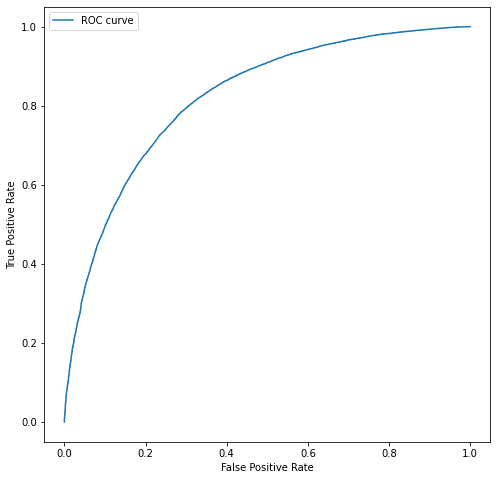

AUC =  0.745486330846143


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

fpr_dt_1, tpr_dt_1,_= roc_curve(y_test,cnb.predict_proba(X_test)[:,1])
plt.plot(fpr_dt_1,tpr_dt_1,label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(8, 8)
plt.show()
roc_score_cnb = roc_auc_score(y_test, y_pred)
print("AUC = ", roc_score_cnb)

## Multinomial Naive Bayes Implementation


### Splitting e vectorization per MultinomialNB


In [ ]:
#Text vectorization e splitting per multinomialNB attraverso TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(sublinear_tf=True, stop_words = "english")
X = tfv.fit_transform(tweet_dataset["processed_tweets"])
y = tweet_dataset["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

### Valutazione algoritmo MultinomialNB
Alcune metriche per la valutazione dell'algoritmo nel train e test set attraverso **Accuracy** e **Confusion matrix**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
y_pred = clf.fit(X_train, y_train).predict(X_test)
cross_clf = cross_val_score(clf, X, y, n_jobs = -1)
print("Confusion Matrix: ")
print("TP", "FN", sep="\t")
print(confusion_matrix(y_test, y_pred)[0])
print(confusion_matrix(y_test, y_pred)[1])
print("FP", "TN", sep="\t")
print("Cross Validation score ={:.2f}%", cross_clf.mean() * 100)                
print ("Train accuracy ={:.2f}%".format(clf.score(X_train,y_train) * 100))
print ("Test accuracy ={:.2f}%".format(clf.score(X_test,y_test) * 100))

Confusion Matrix: 
TP	FN
[15019  4915]
[ 5473 14593]
FP	TN
Cross Validation score ={:.2f}% 74.40849999999999
Train accuracy =82.94%
Test accuracy =74.03%


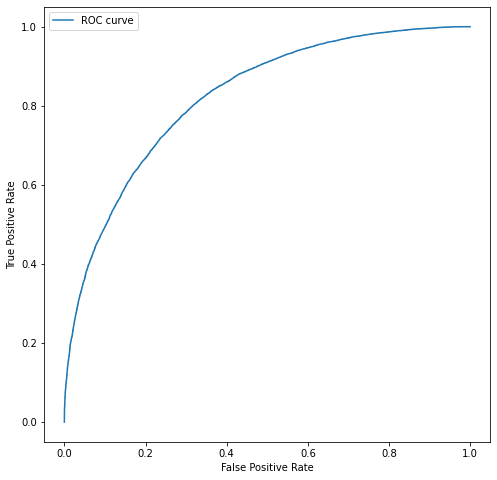

AUC =  0.7403432073375279


In [ ]:
# Plotting ROC per multinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np

fpr_dt_1, tpr_dt_1, _ = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
plt.plot(fpr_dt_1, tpr_dt_1, label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(8, 8)
plt.show()
roc_score_mnt = roc_auc_score(y_test, y_pred)
print("AUC = ",roc_score_mnt)

# Testing predizioni algoritmi Naive Bayes

In [ ]:
def my_predict(s, t = "CNB"):
  '''
  Con my_predict vado a effettuare la predizione di una stringa selezionando il modello preferito
    - Processing della stringa atraverso process_text
    - Text Vectorization della stringa
    - Predizione stringa processata
  '''
  if t == "CNB":
    s = pd.DataFrame([s], columns =["s"])
    s['s'] = s['s'].apply(lambda x: process_text(x))
    s = cv.transform(s["s"].values.astype("U"))
    res = cnb.predict(s)
  else:
    s = pd.DataFrame([s], columns = ["s"])
    s['s'] = s['s'].apply(lambda x: process_text(x))
    s['s'] = s['s'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
    s = tfv.transform(s["s"])
    res = clf.predict(s)
  for el in res:
    if (el == 1):
      pred = "Positiva"
    elif (el == 0):
      pred = "Negativa"
  return pred



### ComplementNB

In [ ]:
stri = "Today i was walking in a park the weather was rainy and i saw a flower that made me really happy"
pred = my_predict(stri, "CNB")
print("Prediction {}".format(pred))

Prediction Positiva


### MultinomialNB

In [ ]:
stri = "When i was a kid i was really lonely and that made me doubting the others and classify them as good or bad company"
pred = my_predict(stri, "MNT")
print("Prediction {}".format(pred))

Prediction Negativa


## Inference script

Inserisci una frase da massimo 30 parole su cui effettuare sentiment analysis

In [ ]:
import ipywidgets as widgets
from IPython.display import display

output = widgets.Output()
text = widgets.Text(placeholder='Enter a sentence to evaluate...')
alg = widgets.Text(placeholder='Algorithm to use...', value = "MNT")
run_button = widgets.Button(description = 'Predict',  button_style='info')
def predict_(b):
    pred = my_predict(text.value, alg.value)
    with output:
      print("Predizione:", pred)
print("Enter a sentence to evaluate")
display(text)
print("Algorithm to use (MultinomialNB --> MNT / ComplementNB --> CNB)")
display(alg)
display(run_button, output)
run_button.on_click(predict_)

Enter a sentence to evaluate


Text(value='', placeholder='Enter a sentence to evaluate...')

Algorithm to use (MultinomialNB --> MNT / ComplementNB --> CNB)


Text(value='MNT', placeholder='Algorithm to use...')

Button(button_style='info', description='Predict', style=ButtonStyle())

Output()